Using TensorFlow backend.


()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
[[199 156 151 151]]
[[199 156 151 151]]
[[200 153 151 151]]
[[200 153 151 151]]
()
()
()
()
[[209 147 148 148]]
[[209 147 148 148]]
[[210 149 148 148]]
[[210 149 148 148]]
[[209 153 152 152]]
[[209 153 152 152]]
[[207 153 154 154]]
[[207 153 154 154]]
[[208 154 154 154]]
[[208 154 154 154]]
[[208 157 152 152]]
[[208 157 152 152]]
[[203 150 160 160]]
[[203 150 160 160]]
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
[[215 152 151 151]]
[[215 152 151 151]]
[[213 

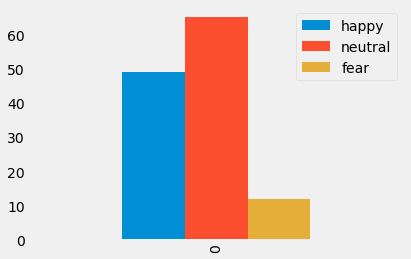

In [1]:
import numpy as np
import cv2
from keras.preprocessing import image

import matplotlib.pyplot as plt
from matplotlib import  style
import collections
import pandas as pd
style.use("fivethirtyeight")
emotions_list = list()
#emotions_list = ['neutral']

# opencv initialization

face_cascade = cv2.CascadeClassifier('C:\\Users\\SMART\\Desktop\\pract\\Haarcascades\\haarcascade_frontalface_default.xml')

# Get a reference to webcam #0 (the default one)
video_capture = cv2.VideoCapture(0)

# face expression recognizer initialization
from keras.models import model_from_json

model = model_from_json(open("C:\\Users\\SMART\\Desktop\\pract\\Haarcascades\\facial_expression_model_structure.json", "r").read())
model.load_weights('C:\\Users\\SMART\\Desktop\\pract\\Haarcascades\\facial_expression_model_weights.h5')  # load weights
# -----------------------------

emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')

while True:
    ret, img = video_capture.read()  # return= dqata type ,return if python able to read #img = numpy arry,represent first img hat video capture..
    img = cv2.flip(img, 1, 0)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    print(faces)  # locations of detected faces

    for (x, y, w, h) in faces:
        # count+=1
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)  # draw rectangle to main image

        detected_face = img[y:y + h, x:x + w]  # crop detected face
        detected_face = cv2.cvtColor(detected_face, cv2.COLOR_BGR2GRAY)  # transform to gray scale
        detected_face = cv2.resize(detected_face, (48, 48))  # resize to 48x48

        img_pixels = image.img_to_array(detected_face)
        img_pixels = np.expand_dims(img_pixels, axis=0)

        img_pixels /= 255  # pixels are in scale of [0, 255]. normalize all pixels in scale of [0, 1]
        # cv2.imwrite("F:\\udemy\\" + " facesample.jpg", img)
        predictions = model.predict(img_pixels)  # store probabilities of 7 expressions

        # find max indexed array 0: angry, 1:disgust, 2:fear, 3:happy, 4:sad, 5:surprise, 6:neutral
        max_index = np.argmax(predictions[0])

        emotion = emotions[max_index]
        emotions_list.append(emotion)
        #emotions_df=emotion_df.astype(int)
        #emotions_df.to_csv('emotion.csv',index=False,sep=',')
        #emotions_df.plot
        # write emotion text above rectangle
        cv2.putText(img, emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        
        
    cv2.imwrite("F:\\udemy\\" + " facesample.jpg", img)
    # return ,img

    cv2.imshow('img', img)

    if cv2.waitKey(1) & 0xFF == ord('q'):  # Hit 'q' on the keyboard to quit!

        ############ Change 3 ############

        counter = collections.Counter(emotions_list)

        emotions_df = pd.DataFrame(counter, index=[0])

        emotions_df = emotions_df.astype(int)

        emotions_df.plot(kind='bar')
        plt.grid()


        plt.show()

        break

# Release handle to the webcamqqqq
video_capture.release()
cv2.destroyAllWindows()
